In [ ]:
import requests
import numpy as np
import pandas as pd
import json
import datetime


In [ ]:
iniDate = ''
endDate = ''
stockid = ''

In [ ]:
def crawl_price(stock_id):
    d = datetime.datetime.now()
    url = "https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=0&period2="+str(int(d.timestamp()))+"&interval=1d&events=history"

    res = requests.get(url)
    data = json.loads(res.text)
    df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
    return df

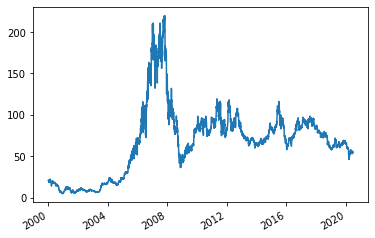

In [ ]:
df = crawl_price("2354.TW")
df.close.plot()

In [ ]:
print(df)

                          high        volume      close        low       open
2000-01-04 01:00:00  21.253500  1.865551e+07  21.253500  20.072300  20.545401
2000-01-05 01:00:00  22.080700  1.864388e+10  21.372601  20.783501  20.783501
2000-01-06 01:00:00  21.726700  1.230234e+10  20.899500  20.783501  21.491600
2000-01-07 01:00:00  21.018499  9.012566e+09  20.545401  20.545401  20.545401
2000-01-10 01:00:00  21.137501  1.085186e+10  20.545401  20.545401  20.545401
...                        ...           ...        ...        ...        ...
2020-06-18 01:00:00  55.200001  2.867690e+06  55.200001  54.099998  54.799999
2020-06-19 01:00:00  55.400002  6.571925e+06  54.099998  54.099998  55.400002
2020-06-22 01:00:00  54.500000  2.043071e+06  54.400002  53.900002  54.299999
2020-06-23 01:00:00  55.200001  2.394357e+06  54.700001  54.299999  55.000000
2020-06-24 01:00:00  56.000000  6.435750e+06  55.900002  55.200001  55.299999

[5131 rows x 5 columns]


In [ ]:
def crawl_global_symbol():
  url = "https://finance.yahoo.com/world-indices/"
  response = requests.get(url)
  import io
  f = io.StringIO(response.text)
  dfs = pd.read_html(f)
  world_index = dfs[0]
  return world_index

In [ ]:
df = crawl_global_symbol()
df

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,3050.33,-80.96,-2.59%,3.203B,NaN,NaN,NaN
1,^DJI,Dow Jones Industrial Average,25445.94,-710.16,-2.72%,452.534M,NaN,NaN,NaN
2,^IXIC,NASDAQ Composite,9909.17,-222.20,-2.19%,807.52M,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),11726.54,-351.21,-2.91%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,1949.70,-43.77,-2.20%,0,NaN,NaN,NaN
5,^BUK100P,Cboe UK 100 Price Return,10357.11,-14.33,-0.14%,0,NaN,NaN,NaN
6,^RUT,Russell 2000,1389.74,-49.60,-3.45%,0,NaN,NaN,NaN
7,^VIX,Vix,34.32,2.95,+9.40%,0,NaN,NaN,NaN
8,^FTSE,FTSE 100,6125.26,1.57,+0.03%,0,NaN,NaN,NaN
9,^GDAXI,DAX PERFORMANCE-INDEX,12203.52,109.58,+0.91%,0,NaN,NaN,NaN


In [ ]:
# import time
# globalDict = {}
# for i in df['Symbol']:
#   globalDict[i] = crawl_price(i)
#   time.sleep(5)

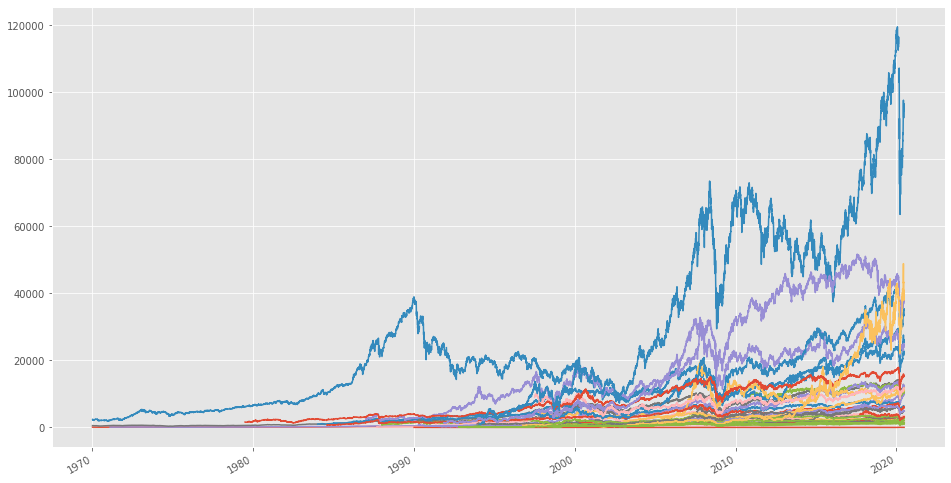

In [ ]:
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (16, 9)
# plt.style.use('ggplot')

# for name, df in globalDict.items():
#   df.close.plot()

In [ ]:
def crawl_adjprice(stock_id):
    d = datetime.datetime.now()
    url = "https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=0&period2="+str(int(d.timestamp()))+"&interval=1d&events=history"

    res = requests.get(url)
    data = json.loads(res.text)
    df = pd.DataFrame(data['chart']['result'][0]['indicators']['adjclose'][0]['adjclose'], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
    return df

In [ ]:
df = crawl_global_symbol()

worldDict = {}
for index_name, name in zip(df['Symbol'], df['Name']):
  worldDict[name] = crawl_adjprice(index_name)
  # time.sleep(1)

In [ ]:
close = {}
for name, price in worldDict.items():
  if (len(price)!=0):
    close[name] = price[0]

df_close = pd.DataFrame(close)
df_close = df_close.resample('1d').last().dropna(how='all', axis=1).dropna(how='all', axis=0)
df_close.head()



,S&P 500,Dow Jones Industrial Average,NASDAQ Composite,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100 Price Return,Russell 2000,Vix,FTSE 100,DAX PERFORMANCE-INDEX,CAC 40,ESTX 50 PR.EUR,EURONEXT 100,BEL 20,MOEX Russia Index,Nikkei 225,HANG SENG INDEX,SSE Composite Index,Shenzhen Component,STI Index,S&P/ASX 200,ALL ORDINARIES,S&P BSE SENSEX,Jakarta Composite Index,FTSE Bursa Malaysia KLCI,S&P/NZX 50 INDEX GROSS,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
1970-01-02,93.000000,NaN,NaN,550.890015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,93.459999,NaN,NaN,553.640015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2402.850098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,92.820000,NaN,NaN,549.830017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2406.219971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,92.629997,NaN,NaN,548.989990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2394.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,92.680000,NaN,NaN,549.409973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2283.679932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corr = df_close.corr()
print(corr)

                               S&P 500  ...  Top 40 USD Net TRI Index
S&P 500                       1.000000  ...                 -0.118029
Dow Jones Industrial Average  0.995901  ...                  0.149516
NASDAQ Composite              0.979616  ...                 -0.389039
NYSE COMPOSITE (DJ)           0.980703  ...                  0.586349
NYSE AMEX COMPOSITE INDEX     0.709668  ...                  0.801030
Cboe UK 100 Price Return      0.812222  ...                  0.806598
Russell 2000                  0.971569  ...                  0.649904
Vix                          -0.125163  ...                 -0.700410
FTSE 100                      0.910875  ...                  0.800710
DAX PERFORMANCE-INDEX         0.974199  ...                  0.671750
CAC 40                        0.779444  ...                  0.556580
ESTX 50 PR.EUR                0.476964  ...                  0.661375
EURONEXT 100                  0.746161  ...                  0.566896
BEL 20              

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


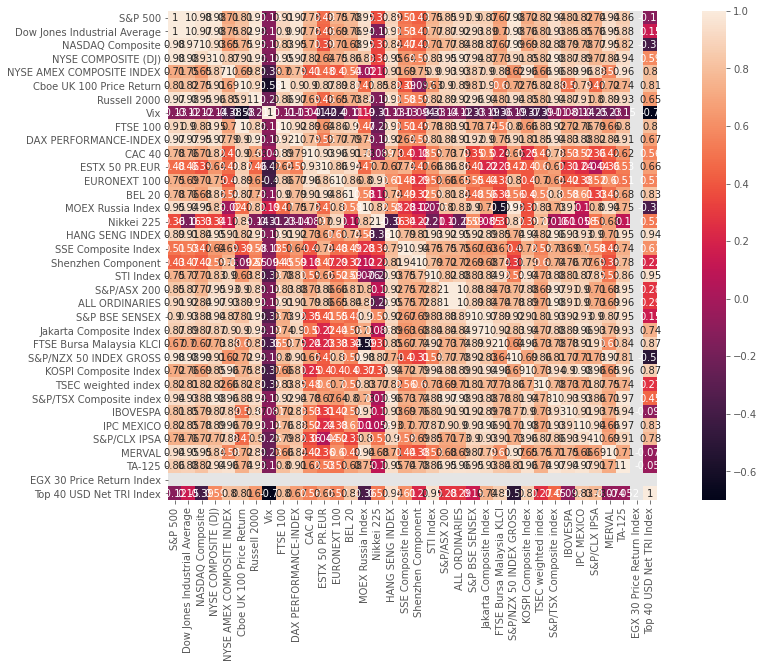

In [ ]:
import seaborn as sns
sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)

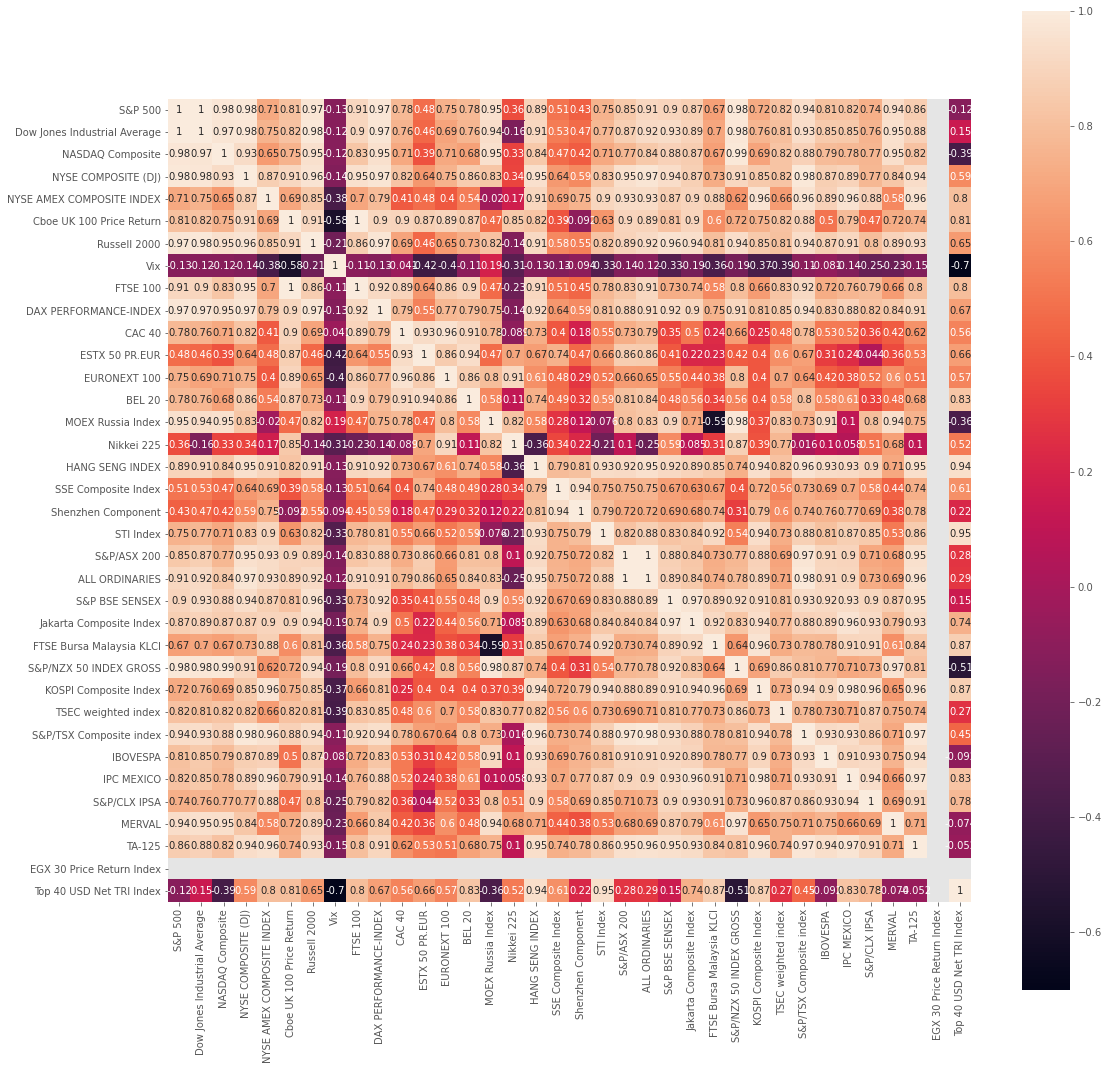

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 18)

import seaborn as sns
sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)

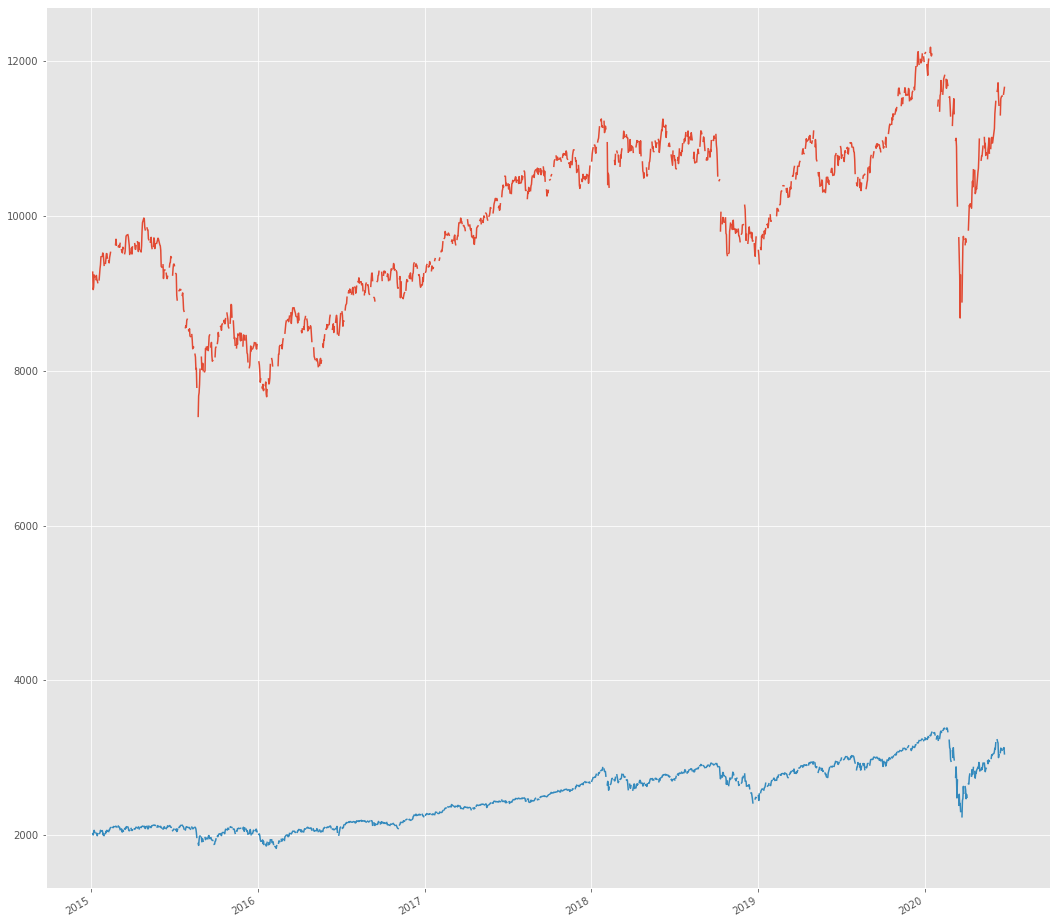

In [ ]:
df_close['TSEC weighted index']['2015':].plot()
df_close['S&P 500']['2015':].plot()

In [ ]:
pct_change = df_close.pct_change()
profit = pct_change.mean()
profit.sort_values()

Top 40 USD Net TRI Index       -0.000133
ESTX 50 PR.EUR                  0.000025
EURONEXT 100                    0.000068
Cboe UK 100 Price Return        0.000077
FTSE Bursa Malaysia KLCI        0.000112
TSEC weighted index             0.000115
BEL 20                          0.000174
STI Index                       0.000179
CAC 40                          0.000190
S&P/ASX 200                     0.000208
FTSE 100                        0.000221
NYSE AMEX COMPOSITE INDEX       0.000224
SSE Composite Index             0.000228
Nikkei 225                      0.000229
S&P/TSX Composite index         0.000232
ALL ORDINARIES                  0.000243
NYSE COMPOSITE (DJ)             0.000262
KOSPI Composite Index           0.000268
Shenzhen Component              0.000273
S&P/CLX IPSA                    0.000290
Russell 2000                    0.000294
S&P 500                         0.000295
Jakarta Composite Index         0.000310
TA-125                          0.000312
MOEX Russia Inde

In [ ]:
risk = pct_change.std()
sharpe = profit / risk  * (252 **0.5)
sharpe.sort_values()

Top 40 USD Net TRI Index       -0.122025
ESTX 50 PR.EUR                  0.029165
EURONEXT 100                    0.089132
Cboe UK 100 Price Return        0.132757
TSEC weighted index             0.146268
FTSE Bursa Malaysia KLCI        0.155239
CAC 40                          0.236609
BEL 20                          0.257471
STI Index                       0.258714
SSE Composite Index             0.259342
KOSPI Composite Index           0.273361
Shenzhen Component              0.273959
Nikkei 225                      0.299197
FTSE 100                        0.343857
NYSE AMEX COMPOSITE INDEX       0.348470
HANG SENG INDEX                 0.364875
S&P/ASX 200                     0.366709
Russell 2000                    0.376972
Jakarta Composite Index         0.379766
S&P/TSX Composite index         0.398965
DAX PERFORMANCE-INDEX           0.419340
NYSE COMPOSITE (DJ)             0.420779
ALL ORDINARIES                  0.421514
TA-125                          0.431787
S&P BSE SENSEX  

In [ ]:
pct_change = df_close.pct_change()
profit = pct_change.rolling(252).mean()
risk = pct_change.rolling(252).std()
sharpe = profit / risk * (252 ** 0.5)

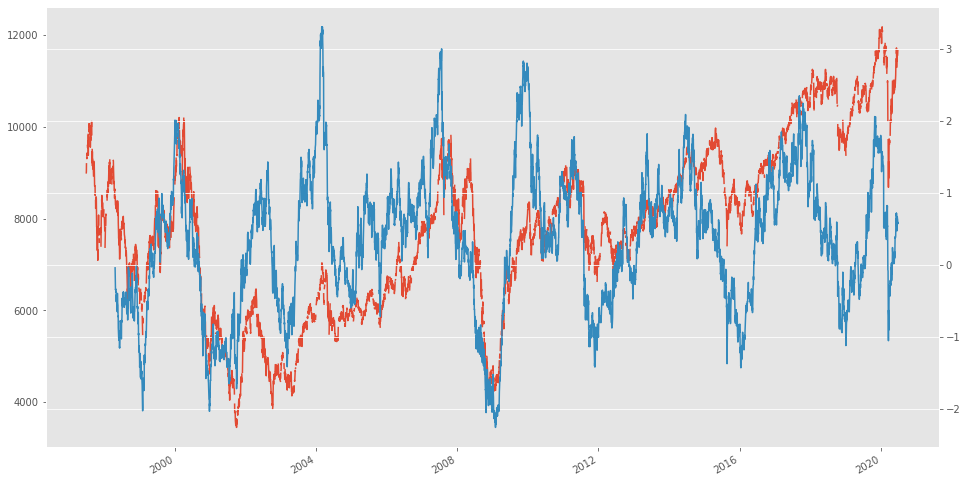

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

df_close['TSEC weighted index'].plot()
sharpe['TSEC weighted index'].plot(secondary_y=True)

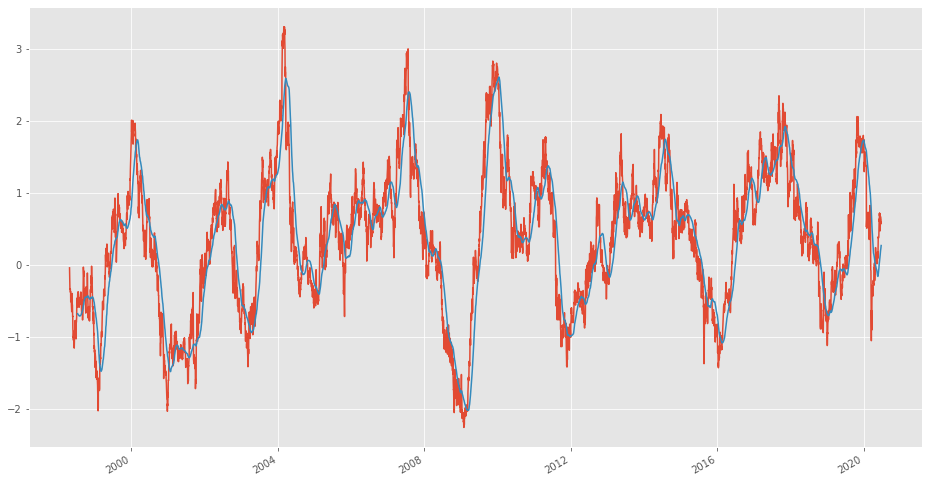

In [ ]:
sr = sharpe['TSEC weighted index'].dropna()
d = 60
srsma = sr.rolling(d).mean()
sr.plot()
srsma.plot()

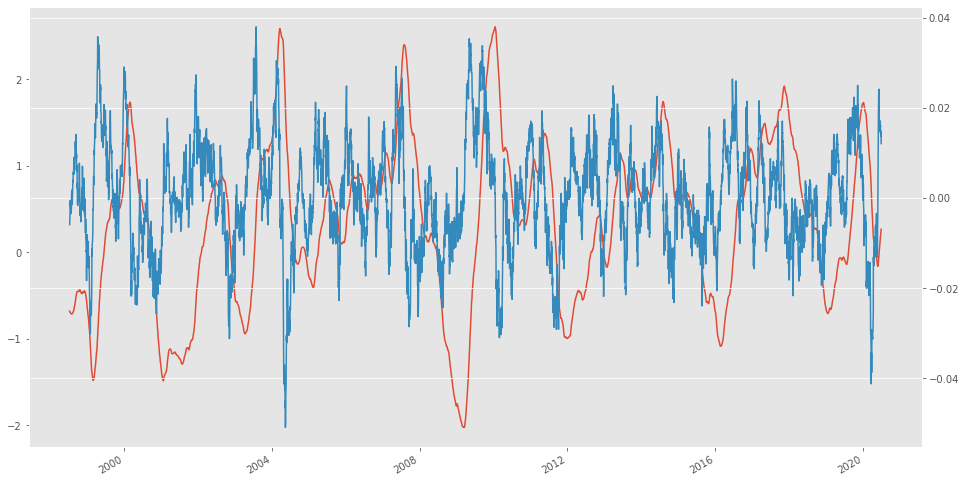

In [ ]:
srsma = sr.rolling(d).mean()
srsmadiff = srsma.diff()
srsma.plot()
srsmadiff.plot(secondary_y=True)

pandas.core.series.Series

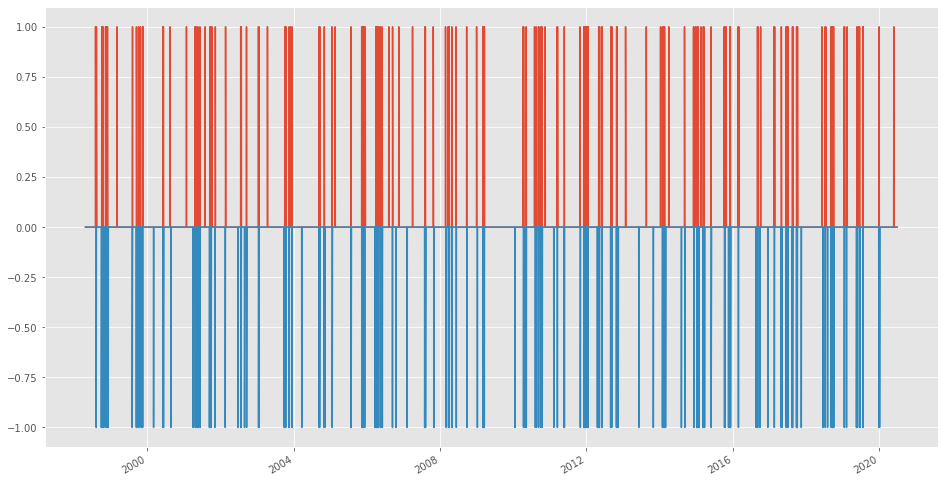

In [ ]:
buy = (srsmadiff > 0) & (srsmadiff.shift() < 0)
sell = (srsmadiff < 0) & (srsmadiff.shift() > 0)

(buy * 1).plot()
(sell * -1).plot()

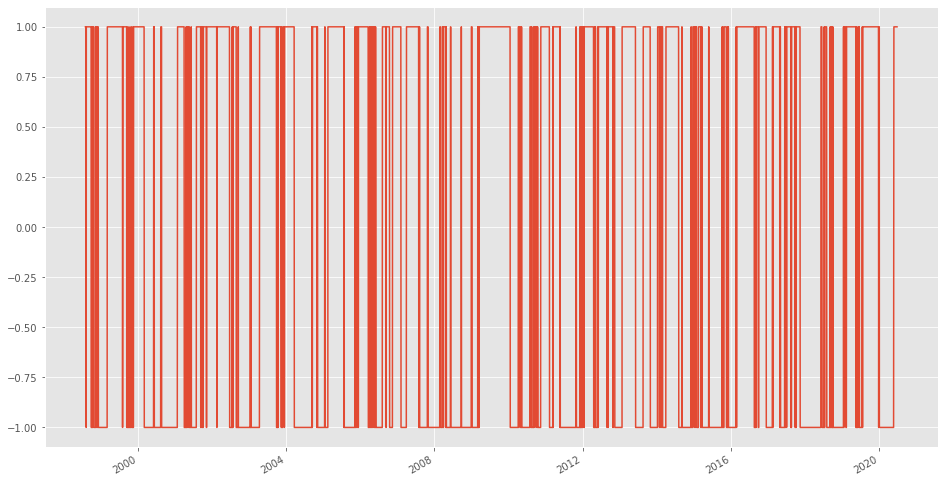

In [ ]:
import numpy as np
hold = pd.Series(np.nan, index = buy.index)
hold[buy] = 1
hold[sell] = -1
hold.ffill(inplace=True)
hold.plot()

In [ ]:
df = pd.Series(['10','100','500','100','500','1000']).apply(lambda x:pd.to_numeric(x))
pct_change = df.pct_change()
pct_ratio = (pct_change.shift(-1)+1)
# pct_ratio = (df/df.shift(1))
# pct_change
pct_ratio
# df

0    10.0
1     5.0
2     0.2
3     5.0
4     2.0
5     NaN
dtype: float64

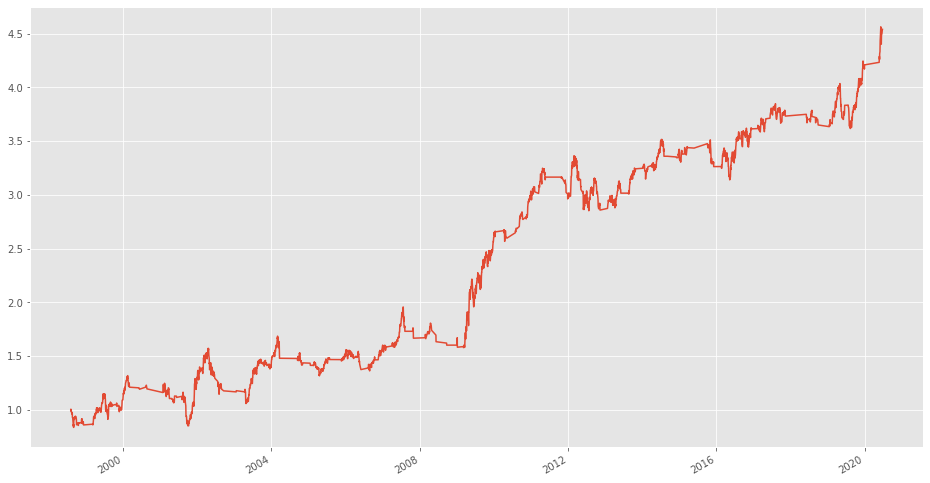

In [ ]:
twii = df_close['TSEC weighted index'][buy.index]

pct_change = twii.pct_change()
pct_ratio = (pct_change.shift(-1)+1) # 今天到明天的價格變化
pct_change
pct_ratio
pct_ratio.fillna(1)[hold == 1].cumprod().plot()
# pct_change.fillna(1)[hold == 1].cumprod().plot()